In [1]:
from branching_model import simulate_branching_model
import matplotlib.pyplot as plt

In [41]:
num_neurons = 2400
connections_per_neuron = 4
transmission_probability = 0.25
p_spont = 1e-5
max_connections = None
total_time_steps = 10000
num_layers = 60

results = simulate_branching_model(
    num_neurons=num_neurons,
    connections_per_neuron=connections_per_neuron,
    transmission_probability=transmission_probability,
    p_spont=p_spont,
    max_connections=max_connections,
)

Text(0.5, 1.0, 'Active Neurons Over Time')

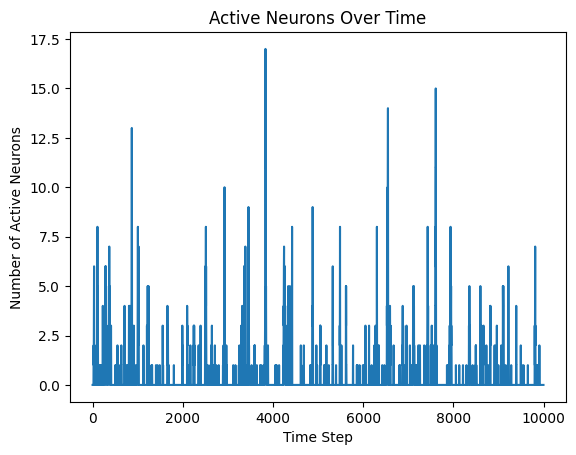

In [42]:
plt.plot([len(sim_log['active_neurons']) for sim_log in results['raw_results']['simulation_log']])
plt.xlabel('Time Step')
plt.ylabel('Number of Active Neurons')
plt.title('Active Neurons Over Time')


In [43]:
# average_density = sum(
#     len(sim_log['active_neurons'])
#     for sim_log in results['raw_results']['simulation_log']
# ) / len(results['raw_results']['simulation_log']) / num_neurons

density = (
    len(results['raw_results']['simulation_log'][-1]['active_neurons'])
     / num_neurons
)

print(f'average_density: {density}')
print(f'avg_branching_ratio: {results["statistics"]["avg_branching_ratio"]}')


average_density: 0.0
avg_branching_ratio: 0.9604466222927794


Text(0.5, 1.0, 'Avalanche Size Distribution')

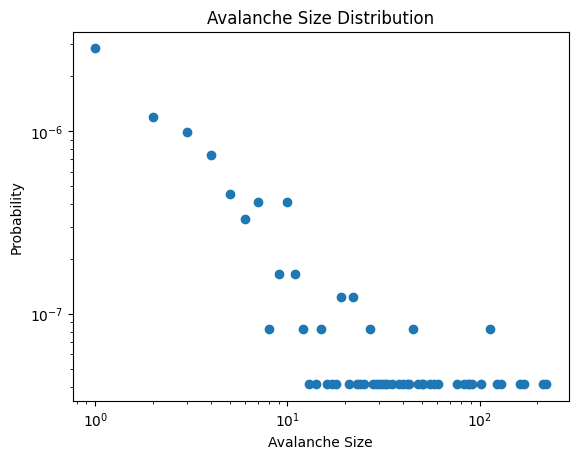

In [44]:
avalanche_size, avalanche_count = zip(*results['statistics']['avalanche_histogram'].items())
avalance_probabilities = [count*p_spont / sum(avalanche_count) for count in avalanche_count]
plt.loglog(avalanche_size, avalance_probabilities, 'o')
plt.xlabel('Avalanche Size')
plt.ylabel('Probability')
plt.title('Avalanche Size Distribution')

